11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



RESULTS:
Hidden Layers: 2
Neurons per Layer: 128
Learning Rate: 0.001
Batch Size: 64
Training Time: 26.32 seconds
Test Accuracy: 0.9753
Test Loss: 0.0818


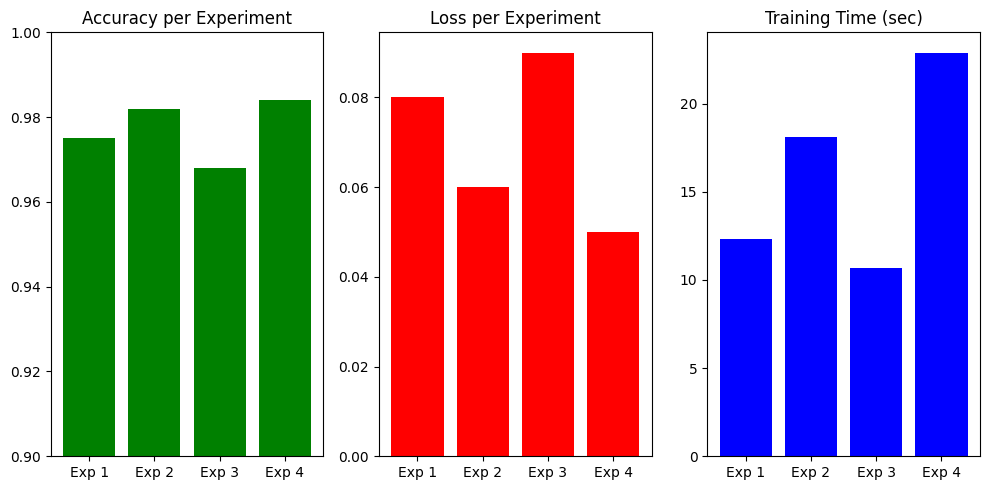

In [2]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns # Import seaborn

# Deep Learning libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values (0 to 1 instead of 0 to 255)
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode the target labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# Set your desired hyperparameters
hidden_layers = 2       # Change this to 1 or 3 if you want
neurons = 128           # Try 64 or 256
learning_rate = 0.001   # Try 0.01
batch_size = 64         # Try 32 or 128


# Build the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))

# Add hidden layers
model.add(Dense(neurons, activation='relu'))
model.add(Dense(neurons, activation='relu'))  # Add more if hidden_layers=3

# Output layer
model.add(Dense(10, activation='softmax'))


# Compile the model
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
start_time = time.time()
history = model.fit(X_train, y_train, epochs=5, batch_size=batch_size, verbose=0)
end_time = time.time()


test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
training_time = round(end_time - start_time, 2)


# Show results
print(f"\nRESULTS:")
print(f"Hidden Layers: {hidden_layers}")
print(f"Neurons per Layer: {neurons}")
print(f"Learning Rate: {learning_rate}")
print(f"Batch Size: {batch_size}")
print(f"Training Time: {training_time} seconds")
print(f"Test Accuracy: {round(test_accuracy, 4)}")
print(f"Test Loss: {round(test_loss, 4)}")\



# Data
data = {
    'Experiment': ['Exp 1', 'Exp 2', 'Exp 3', 'Exp 4'],
    'Accuracy': [0.975, 0.982, 0.968, 0.984],
    'Loss': [0.08, 0.06, 0.09, 0.05],
    'Time': [12.3, 18.1, 10.7, 22.9]
}

df = pd.DataFrame(data)

# Accuracy Chart
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.bar(df['Experiment'], df['Accuracy'], color='green')
plt.title('Accuracy per Experiment')
plt.ylim(0.9, 1.0)

# Loss Chart
plt.subplot(1, 3, 2)
plt.bar(df['Experiment'], df['Loss'], color='red')
plt.title('Loss per Experiment')

# Time Chart
plt.subplot(1, 3, 3)
plt.bar(df['Experiment'], df['Time'], color='blue')
plt.title('Training Time (sec)')

plt.tight_layout()
plt.show()